In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
import pandas as pd
from sklearn.cluster import MeanShift
from mpl_toolkits.mplot3d import Axes3D

In [141]:
df = pd.read_csv(r"E:\Python-Notebooks\big_data_challenge\datasets_bdc\rced_en (1).csv")
df.replace('Non-indigenous', 'Non-Indigenous', inplace=True)
df.head()

,OBJECT ID,Community name,Alternative community name,Province/Territory,Community record status,Community type,Latitude (°),Longitude (°),Community classification,Indigenous category,...,Is this a fly-in community?,Population,Main power source,Name of service provider,Total fossil fuel generating capacity (kW),Annual fossil fuel generation (MWh/yr),Price of fuel at site,Units,Total renewable energy generation (kW),Community energy plan
0,1,Les Îles-de-la-Madeleine,Magdalen Islands,QC,Active > Multi-community local microgrid,Settlement,47.383330,-61.866600,Non-Indigenous,NaN,...,No,12475.0,Heavy fuel oil,Hydro-Quebec,67044.0,181648.00,0.70,$/l,0.0,NaN
1,2,Ocean Falls,NaN,BC,Active > Multi-community local microgrid,Settlement,52.350000,-127.700000,Non-Indigenous,NaN,...,No,203.0,Hydro,BC Hydro,NaN,NaN,NaN,NaN,10000.0,NaN
2,3,Whitehorse 8,NaN,YT,Active > Grid connected: Yukon or NWT grid,Settlement,60.750000,-135.080000,Indigenous,First Nation,...,No,NaN,Prov./terr. grid,Yukon Energy Corp.,NaN,NaN,0.33,$/l,0.0,NaN
3,4,Bella Bella,Bella Bella 1,BC,Active > Multi-community local microgrid,Settlement,52.160340,-128.145480,Indigenous,First Nation,...,No,1019.0,Hydro,BC Hydro,4900.0,982.87,NaN,NaN,0.0,NaN
4,5,Wagisla,NaN,BC,Active > Multi-community local microgrid,Settlement,52.161667,-128.143611,Indigenous,First Nation,...,No,NaN,Hydro,BC Hydro,NaN,NaN,NaN,NaN,0.0,NaN


In [142]:
df = df[['Province/Territory','Community record status', 'Community type', 'Community classification', 'Indigenous category',
        'Is there year-round road access to this community?', 'Population', 'Main power source', 
         'Total renewable energy generation (kW)']]
df.head()

,Province/Territory,Community record status,Community type,Community classification,Indigenous category,Is there year-round road access to this community?,Population,Main power source,Total renewable energy generation (kW)
0,QC,Active > Multi-community local microgrid,Settlement,Non-Indigenous,NaN,No,12475.0,Heavy fuel oil,0.0
1,BC,Active > Multi-community local microgrid,Settlement,Non-Indigenous,NaN,No,203.0,Hydro,10000.0
2,YT,Active > Grid connected: Yukon or NWT grid,Settlement,Indigenous,First Nation,Yes,NaN,Prov./terr. grid,0.0
3,BC,Active > Multi-community local microgrid,Settlement,Indigenous,First Nation,No,1019.0,Hydro,0.0
4,BC,Active > Multi-community local microgrid,Settlement,Indigenous,First Nation,No,NaN,Hydro,0.0


In [143]:
def getUniqueValues(arr):
    track = set()
    for i in arr:
        track.add(i)
    return track

In [164]:
provinces = list(getUniqueValues(df['Province/Territory']))
province_map = createMap(provinces)
provinces

['ON', 'NT', 'NU', 'QC', 'SK', 'NL', 'AB', 'BC', 'YT', 'MB']

In [145]:
grids = list(getUniqueValues(df['Community record status']))
grid_map = createMap(grids)
grid_map

{'Active > Grid connected: Yukon or NWT grid': 0,
 'Active > Single community off-grid': 1,
 'Active > Multi-community local microgrid': 2}

In [146]:
comms = list(getUniqueValues(df['Community type']))
comms_map = createMap(comms)

In [147]:
comm_class = list(getUniqueValues(df['Community classification']))
comm_class_map = createMap(comm_class)
comm_class

['Non-Indigenous', 'Indigenous']

In [148]:
indigenous = list(getUniqueValues(df['Indigenous category']))
indigenous_map = createMap(indigenous)
indigenous

[nan, 'Indigenous Collective', 'Inuit', 'First Nation']

In [149]:
road_access = ['No', 'Yes']
road_map = createMap(road_access[0:2])
road_map

{'No': 0, 'Yes': 1}

In [150]:
power = list(getUniqueValues(df['Main power source']))
power_map = {'Hydro':1, 'Other':2, 'Diesel':2, 'Natural Gas':2, 'Prov./terr. grid':2, 'Heavy fuel oil':2, 'Unknown':2}
power_map

{'Hydro': 1,
 'Other': 2,
 'Diesel': 2,
 'Natural Gas': 2,
 'Prov./terr. grid': 2,
 'Heavy fuel oil': 2,
 'Unknown': 2}

In [151]:
col_list = [provinces, grids, comms, comm_class, indigenous, road_access, power]
col_map = [province_map, grid_map, comms_map, comm_class_map, indigenous_map, road_map, power_map]
col_list

[['ON', 'NT', 'NU', 'QC', 'SK', 'NL', 'AB', 'BC', 'YT', 'MB'],
 ['Active > Grid connected: Yukon or NWT grid',
  'Active > Single community off-grid',
  'Active > Multi-community local microgrid'],
 ['Settlement', 'Commercial'],
 ['Non-Indigenous', 'Indigenous'],
 [nan, 'Indigenous Collective', 'Inuit', 'First Nation'],
 ['No', 'Yes'],
 ['Hydro',
  'Other',
  'Diesel',
  'Natural Gas',
  'Prov./terr. grid',
  'Heavy fuel oil',
  'Unknown']]

In [152]:
new_df = df.copy()
for i in range(len(col_list)):
    print(i)
    print(col_list[i])
    for el in col_list[i]:
        new_df.replace(el, 
                       col_map[i][el], inplace=True)

0
['ON', 'NT', 'NU', 'QC', 'SK', 'NL', 'AB', 'BC', 'YT', 'MB']
1
['Active > Grid connected: Yukon or NWT grid', 'Active > Single community off-grid', 'Active > Multi-community local microgrid']
2
['Settlement', 'Commercial']
3
['Non-Indigenous', 'Indigenous']
4
[nan, 'Indigenous Collective', 'Inuit', 'First Nation']
5
['No', 'Yes']
6
['Hydro', 'Other', 'Diesel', 'Natural Gas', 'Prov./terr. grid', 'Heavy fuel oil', 'Unknown']


In [204]:
new_df.dropna()
new_df.head()
comms = ['Grid', 'Single off grid',  'multi off grid']
indigenous[0] = 'non-indgenous'
indigenous[1] = 'collective'

Province/Territory
[128738.6, 35315.0, 0.0, 851355.0, 0.0, 25137.0, 0.0, 0.0, 194803.901, 1382.638]


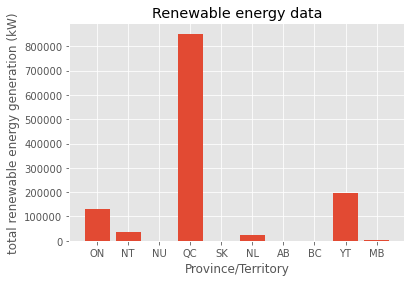

Community record status
[154853.0, 178286.0, 903593.139]


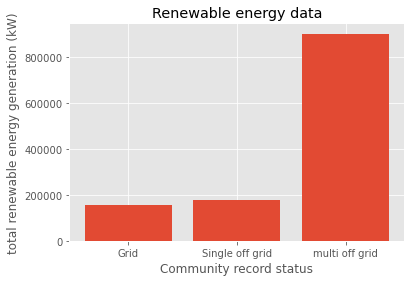

Community classification
[1144865.501, 91866.638]


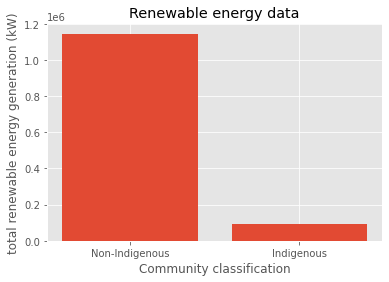

Is there year-round road access to this community?
[182072.13900000002, 1054660.0]


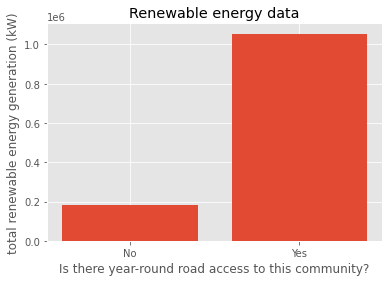

In [203]:
graph_map = {'Province/Territory':provinces, 'Community record status':comms, 'Community classification':comm_class,
             'Is there year-round road access to this community?':road_access}

for key in graph_map:
    print(key)
    data = extract_values(get_renewable_energy(key))
    print(data)
   # print(type(graph_map[key]))
    plt.bar(graph_map[key], data)
    plt.title('Renewable energy data')
    plt.xlabel(key)
    plt.ylabel('total renewable energy generation (kW)')
    plt.show()

[1144865.501, 91811.638, 55.0, 0.0]


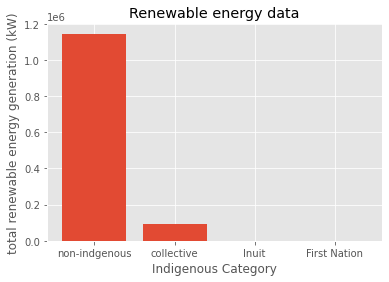

In [208]:
data = extract_values(get_renewable_energy('Indigenous category'))
print(data)
# print(type(graph_map[key]))
plt.bar(indigenous, data)
plt.title('Renewable energy data')
plt.xlabel('Indigenous Category')
plt.ylabel('total renewable energy generation (kW)')
plt.show()

In [25]:
def createMap(arr):
    mpa = {}
    for i in range(len(arr)):
        mpa[arr[i]] = i
    return mpa

In [187]:
def get_renewable_energy(col):
    
    values = {}
    
    for i in range(len(new_df)):
        key = new_df.loc[i, col]
        val = new_df.loc[i, 'Total renewable energy generation (kW)']
        
        if key in values:
            values[key] += val
        else:
            values[key] = val
    return values

In [188]:
def extract_values(dct):
    data = []
    for key in dct:
        data.append(dct[key])
    return data